# Explicacion como contexto

# preguntas


# soluciones 
---

In [155]:
import pandas as pd 
import numpy as np
import zipfile
import kaggle

import seaborn as sns
import matplotlib.pyplot as plt


In [156]:
!kaggle datasets download -d hmavrodiev/london-bike-sharing-dataset

Dataset URL: https://www.kaggle.com/datasets/hmavrodiev/london-bike-sharing-dataset
License(s): other
london-bike-sharing-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [157]:
zipfile_name = 'london-bike-sharing-dataset.zip'
with zipfile.ZipFile(zipfile_name, 'r') as file:
    file.extractall()

In [198]:
data_bikes = pd.read_csv('london_merged.csv')
# borrar lso 0 de la columna 'cnt'
data_bikes = data_bikes[data_bikes['cnt'] != 0]

# Análisis descriptivo de datos de uso de bicicletas

## Estadísticas Descriptivas Generales

Las estadísticas descriptivas proporcionan una visión general de las características del conjunto de datos sobre el uso compartido de bicicletas. A continuación se analiza cada una de las variables presentes:

### Variable `cnt` (Número de bicicletas compartidas)
- **Media**: 1143.10
- **Desviación Estándar**: 1085.11
- **Mínimo**: 0
- **Máximo**: 7860
- Observación: Gran variabilidad en el número de bicicletas alquiladas por hora. En las mejores horas, la demanda puede ser muy alta.

### Variables de Temperatura `t1` (Real) y `t2` (Sensación Térmica)
- **Media t1**: 12.47°C
- **Media t2**: 11.52°C
- **Mínimo t1**: -1.5°C, **Máximo t1**: 34°C
- **Mínimo t2**: -6°C, **Máximo t2**: 34°C
- Observación: La sensación térmica generalmente es más baja que la temperatura real, lo que puede influir en el uso de las bicicletas.

### Variable `hum` (Humedad en %)
- **Media**: 72.32%
- **Rango**: 20.5% a 100%
- Observación: Humedad relativamente alta, con condiciones que varían desde muy secas hasta completamente húmedas.

### Variable `wind_speed` (Velocidad del Viento en km/h)
- **Media**: 15.91 km/h
- **Rango**: 0 a 56.5 km/h
- Observación: Velocidad del viento moderada con momentos de calma total y otros de vientos fuertes.

### Variable `weather_code` (Código de Clima)
- **Media**: 2.72
- **Rango**: 1 a 26
- Observación: Los códigos más bajos, posiblemente condiciones más claras y tranquilas, son más comunes.

### Variables Booleanas `is_holiday` (Si es Día Festivo) y `is_weekend` (Si es Fin de Semana)
- **Días Festivos**: 2.2% son festivos
- **Fines de Semana**: 28.54% son de fin de semana
- Observación: Mayoría de las entradas en días laborables y no de fin de semana, lo que podría influir en el uso.

### Variable `season` (Estaciones del Año)
- **Rango**: 0 (primavera) a 3 (invierno)
- Observación: Presencia de todas las estaciones, útil para analizar el efecto estacional.

## Sugerencias para Análisis Adicionales

1. **Correlación entre Variables**: Analizar cómo variables como temperatura, humedad y velocidad del viento se relacionan con el uso de bicicletas.
2. **Modelos Predictivos**: Utilizar estos datos para construir modelos predictivos de la demanda de bicicletas basados en las condiciones climáticas y otros factores.
3. **Análisis de Series Temporales**: Explorar tendencias estacionales o diarias en el uso de las bicicletas utilizando las marcas de tiempo.


In [199]:
df = data_bikes.copy()
def RenameColumns(data):
    data.columns = ['Time', 'Count', 'Real_time', 'Temp_feels', 'Humidity_percent', 'Wind_speed_km/h', 'Weather', 'is_holiday', 'is_weekend', 'season']
    data = data.applymap(lambda x: x.strip() if isinstance(x, str) else x)
    return data

def DateExtarct(data):
    data['Time'] = pd.to_datetime(data['Time'])
    data['Year'] = data['Time'].dt.year
    data['Month'] = data['Time'].dt.month
    data["day_of_week"] = data["Time"].dt.dayofweek
    data['Day_of_month'] = data['Time'].dt.day
    data["week_of_year"] = data["Time"].dt.isocalendar().week
    data['Hour'] = data['Time'].dt.hour
    # data['Minute'] = data['Time'].dt.minute
    return data

def StringName(data):
    data['season'] = data['season'].replace([0.0, 1.0, 2.0, 3.0], ['Spring', 'Summer', 'Fall', 'Winter'])
    data['Weather'] = data['Weather'].replace([1.0, 2.0, 3.0, 4.0, 7.0, 10.0, 26.0],
                                              ['Clear', 'Scattered clouds', 'Broken clouds', 'Cloudy', 'Rain', 'Thunderstorm', 'Snow'])
    return data 

In [200]:
df

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


In [201]:
df_bikes = RenameColumns(data_bikes)
df_bikes = StringName(df_bikes)
df_bikes = DateExtarct(df_bikes)
df = RenameColumns(df)
df = DateExtarct(df)

In [202]:
# Esta data la usaremos para otro sofware como tableu o power bi
df_bikes.head().style.background_gradient(cmap='BuPu')


,Time,Count,Real_time,Temp_feels,Humidity_percent,Wind_speed_km/h,Weather,is_holiday,is_weekend,season,Year,Month,day_of_week,Day_of_month,week_of_year,Hour
0,2015-01-04 00:00:00,182,3.000000,2.000000,93.000000,6.000000,Broken clouds,0.000000,1.000000,Winter,2015,1,6,4,1,0
1,2015-01-04 01:00:00,138,3.000000,2.500000,93.000000,5.000000,Clear,0.000000,1.000000,Winter,2015,1,6,4,1,1
2,2015-01-04 02:00:00,134,2.500000,2.500000,96.500000,0.000000,Clear,0.000000,1.000000,Winter,2015,1,6,4,1,2
3,2015-01-04 03:00:00,72,2.000000,2.000000,100.000000,0.000000,Clear,0.000000,1.000000,Winter,2015,1,6,4,1,3
4,2015-01-04 04:00:00,47,2.000000,0.000000,93.000000,6.500000,Clear,0.000000,1.000000,Winter,2015,1,6,4,1,4


# 1.Correlacion entre variables

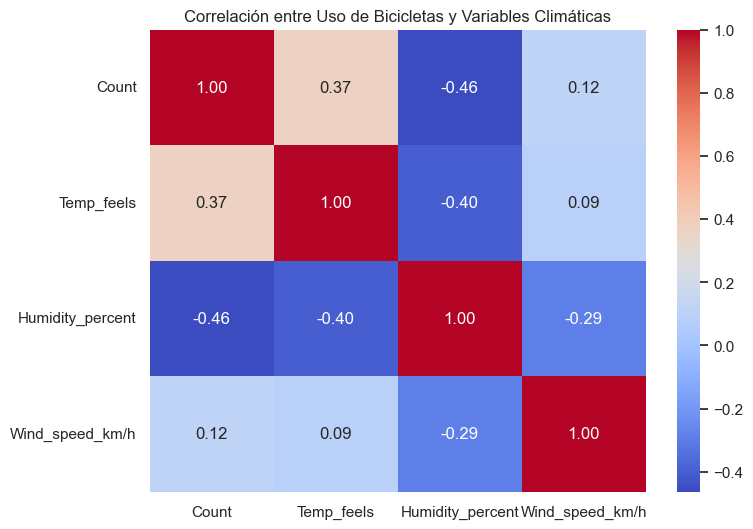

In [203]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculando la matriz de correlación
correlation_matrix = df[['Count', 'Temp_feels', 'Humidity_percent', 'Wind_speed_km/h']].corr()

# Visualizando la matriz de correlación con un heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlación entre Uso de Bicicletas y Variables Climáticas')
plt.show()

## Temperatura Percibida

* La temperatura tiene una correlación positiva (0.37) con el uso de bicicletas.
Insight: Cuando las temperaturas son más altas, se observa un aumento en el uso de bicicletas


* Existe una correlación negativa moderada (-0.46) entre la humedad y el uso de bicicletas.
Insight: Niveles más altos de humedad tienden a disminuir la cantidad de usuarios de bicicletas, probablemente debido a la incomodidad que causa
Velocidad del Viento

* Hay una correlación positiva muy débil (0.12) con el uso de bicicletas, lo cual es estadísticamente poco significativo
Insight: La velocidad del viento parece tener un impacto mínimo en la decisión de las personas de usar bicicletas


Conclusiones para el Cliente: 

La temperatura percibida es el factor climático con mayor influencia en el uso de bicicletas, seguido por la humedad. 

La velocidad del viento es menos relevante para predecir este comportamiento. Estos hallazgos pueden guiar estrategias de marketing y operaciones, especialmente en la promoción del uso de bicicletas en días cálidos y menos húmedos.

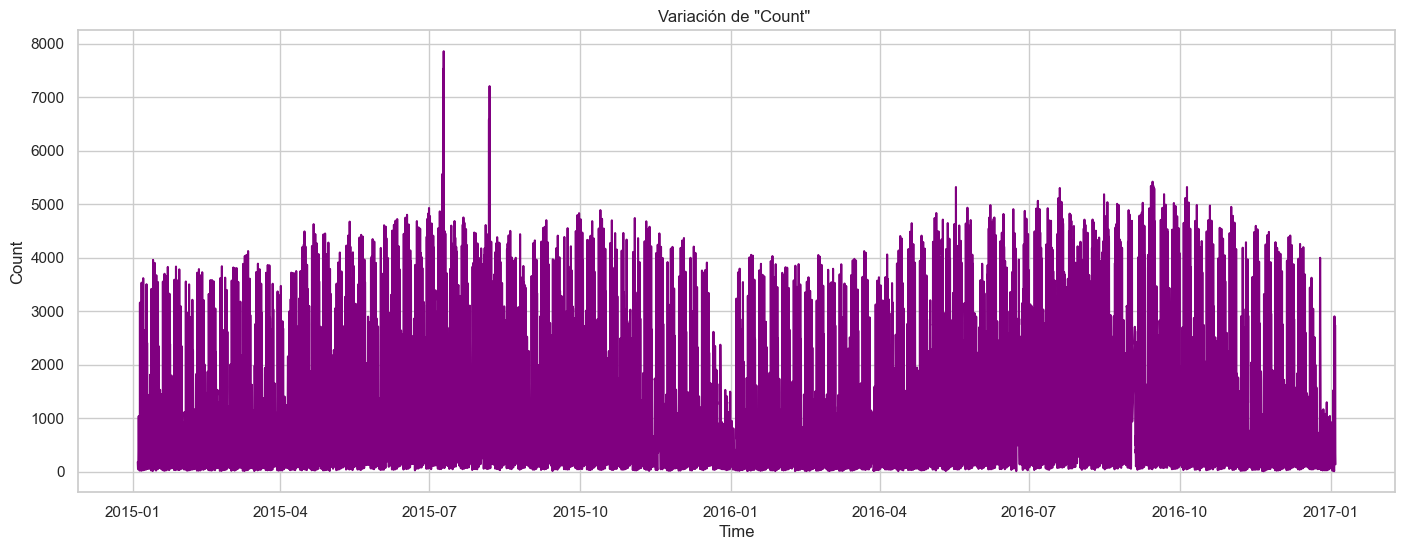

In [204]:
def PlotCountByYear(data):
    plt.figure(figsize=(17, 6))
    sns.lineplot(x='Time', y='Count', data=data, color='purple')
    plt.title('Variación de "Count" ')
    plt.xlabel('Time')
    plt.ylabel('Count')
    plt.show()


PlotCountByYear(df)

In [205]:
df_2016 = df[df['Year'] == 2016]
df_2015 = df[df['Year'] == 2015]

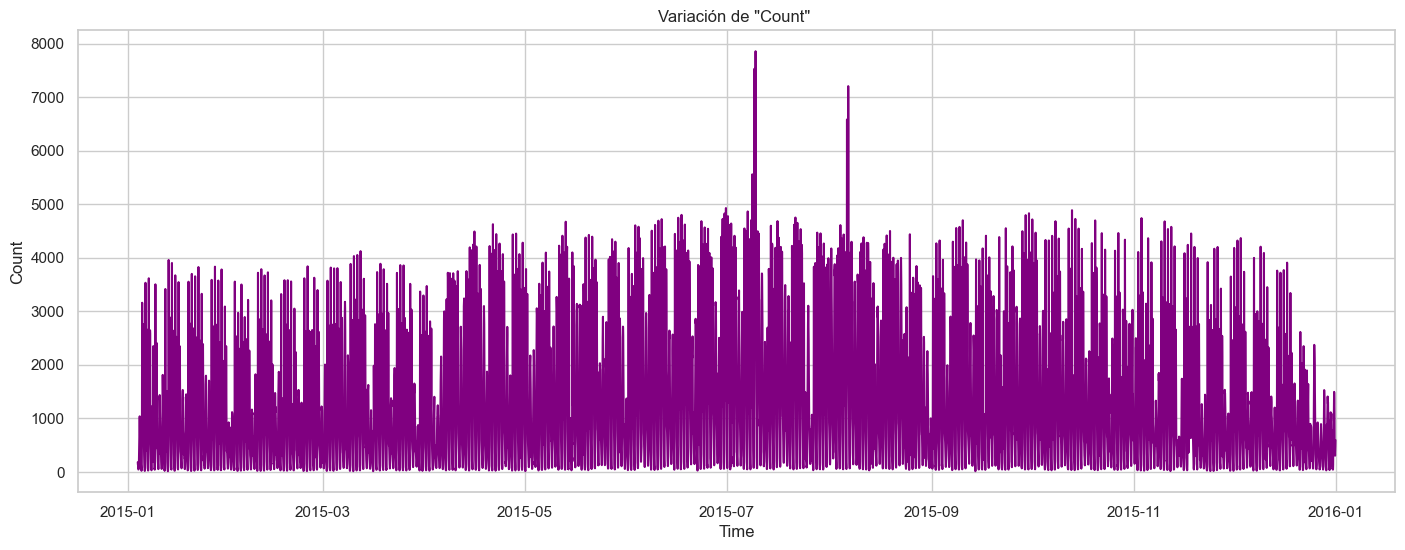

In [206]:
PlotCountByYear(df_2015)

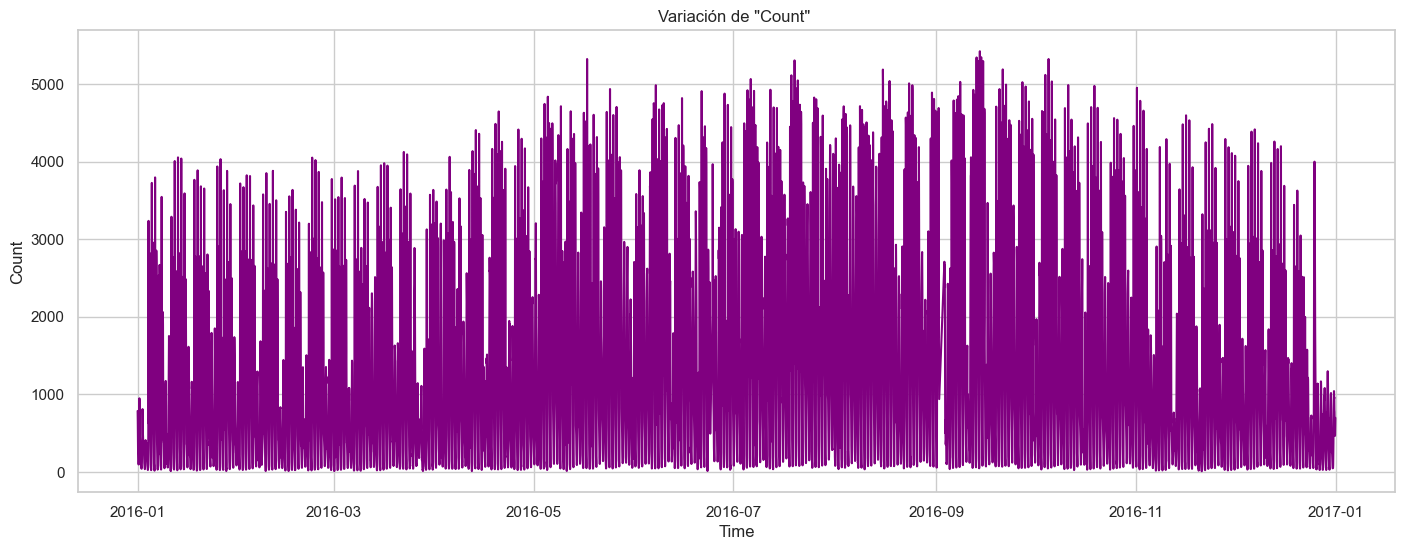

In [207]:
PlotCountByYear(df_2016)

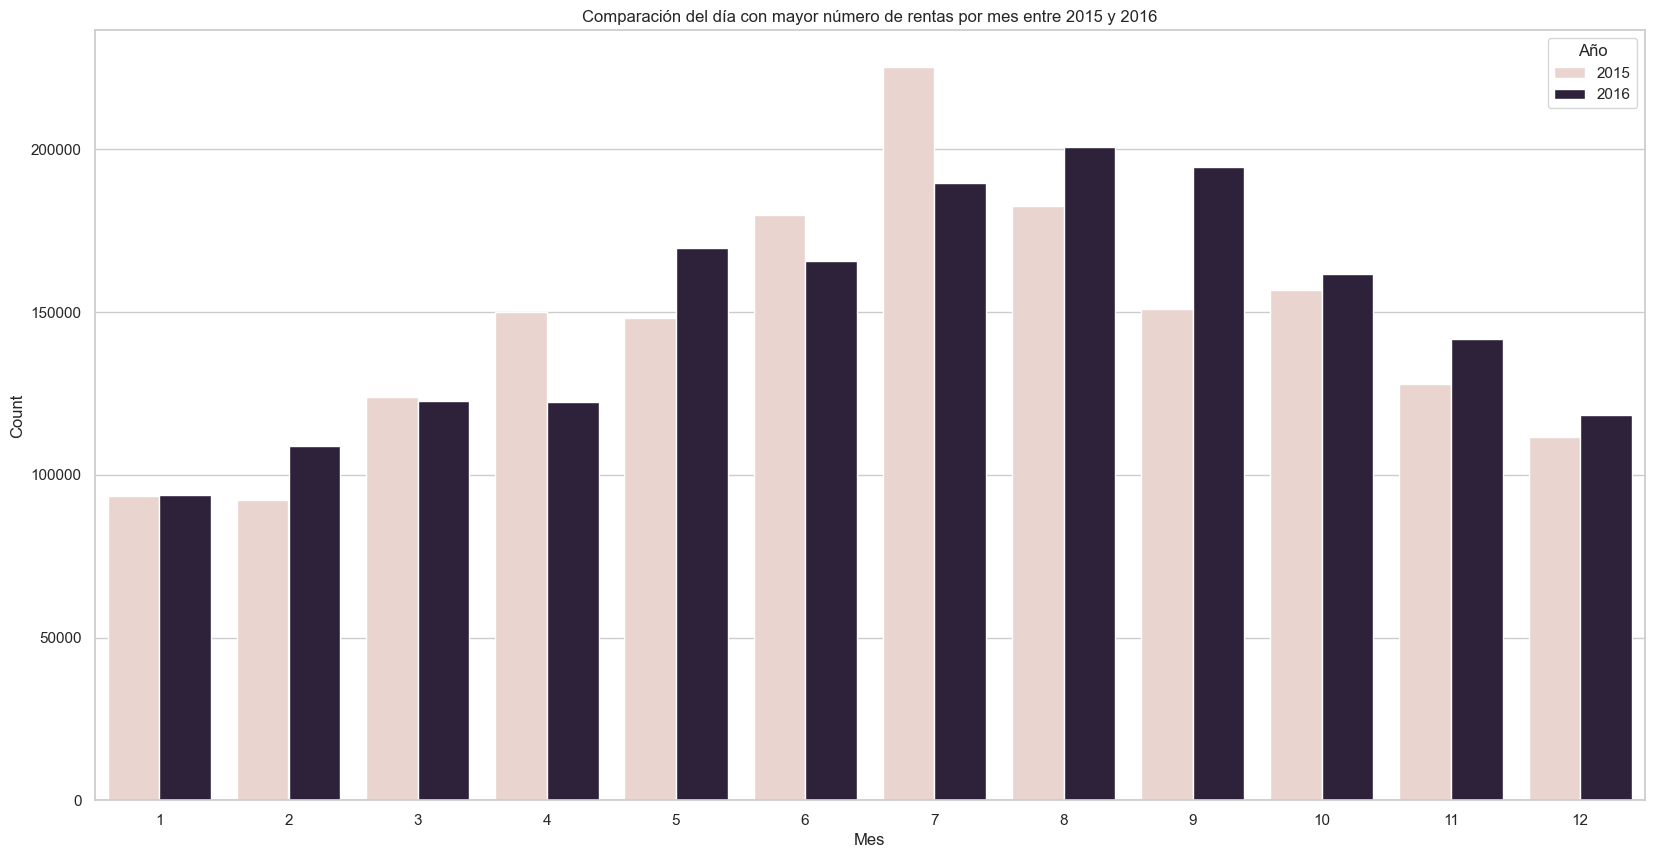

In [208]:
df_filtered = df[df['Year'].isin([2015, 2016])]
# Agrupar por año, mes y día, sumando 'Count'
daily_counts = df_filtered.groupby(['Year', 'Month', 'day_of_week'])['Count'].sum().reset_index()
# Encontrar el día con el máximo 'Count' para cada mes de cada año
max_days_per_month = daily_counts.loc[daily_counts.groupby(['Year', 'Month'])['Count'].idxmax()]
# Ahora podemos graficar los resultados con ambos años en la misma gráfica
plt.figure(figsize=(20, 10))
sns.barplot(x='Month', y='Count', hue='Year', data=max_days_per_month, dodge=True)
plt.title('Comparación del día con mayor número de rentas por mes entre 2015 y 2016')
plt.xlabel('Mes')
plt.ylabel('Count')
plt.legend(title='Año')
plt.show()

No podemos comparar como tal un dia del año 2015 con el 2016, ya que no tenemos datos de los mismos dias en ambos años, es decir el domingo 1 de enero de 2015 no es el mismo que el domingo 1 de enero de 2016, por lo que no podemos compararlos directamente como tal pero si podemos intentar saber que dia se renta mas es decir si los domingos se renta mas por fin de semana

# 2. Modelos Predictivos

En el contexto de un sistema de bicicletas compartidas, normalmente el "conteo" es la métrica de mayor interés para la empresa o servicio, ya que representa directamente el uso del servicio. Por lo tanto, si tu objetivo es optimizar la cantidad de bicicletas disponibles, mejorar el servicio o entender los patrones de uso, objetivo es analizar o predecir el uso de bicicletas compartidas, entonces "cnt", que representa el "conteo de nuevos compartidos de bicicletas", sería la variable objetivo la cual llamamos Count

* Realizar la detección de valores atípicos (outliers) es una práctica estándar en el análisis de datos

* Q1 = Calcula el primer cuartil (Q1) de los datos de "Count". Esto es el valor por debajo del cual se encuentra el 25% de los datos
* Q3 = Calcula el tercer cuartil (Q3) de los datos de "Count". Esto es el valor por debajo del cual se encuentra el 75% de los datos
* IQR = Q3 - Q1: Calcula el rango intercuartílico (IQR), que es la diferencia entre Q3 y Q1 y representa el rango dentro del cual se encuentra el 50% central de los datos

lower_limit = Q1 - 1.5 * IQR: Esto calcula el límite inferior. Cualquier valor de "Count" que sea menor que este límite se consideraría un valor atípico extremadamente bajo.

upper_limit = Q3 + 1.5 * IQR: Esto calcula el límite superior. Cualquier valor de "Count" que sea mayor que este límite se consideraría un valor atípico extremadamente alto.

Los valores que están fuera de estos límites se consideran alejados de la variación "típica" de los datos y pueden ser sujetos a un análisis adicional


In [209]:
Quantil_1 = df['Count'].quantile(0.25)
Quantil_3 = df['Count'].quantile(0.75)
IQR = Quantil_3 - Quantil_1
# LDefinimos los limites para los outliers
Lower_limit = Quantil_1 - 1.5 * IQR
Upper_limit = Quantil_3 + 1.5 * IQR

In [210]:
# Identificar los outliers
outliers = df[(df['Count'] < Lower_limit) | (df['Count'] > Upper_limit)]
sample_outliers = outliers.sample(n=10, random_state=1) # solo mostarra 10 outliers
print('Outliers shape is: ',outliers.shape[0])
# Aplicar el gradiente de fondo a la muestra
styled_sample = sample_outliers.style.background_gradient(cmap='Blues')
styled_sample

Outliers shape is:  672


,Time,Count,Real_time,Temp_feels,Humidity_percent,Wind_speed_km/h,Weather,is_holiday,is_weekend,season,Year,Month,day_of_week,Day_of_month,week_of_year,Hour
4221,2015-06-29 08:00:00,4393,18.500000,18.500000,60.000000,7.000000,1.000000,0.000000,0.000000,1.000000,2015,6,0,29,27,8
12894,2016-06-27 18:00:00,3888,20.000000,20.000000,46.000000,18.000000,1.000000,0.000000,0.000000,1.000000,2016,6,0,27,26,18
4254,2015-06-30 17:00:00,4657,27.000000,27.000000,42.000000,25.000000,1.000000,0.000000,0.000000,1.000000,2015,6,1,30,27,17
14447,2016-08-31 18:00:00,4656,23.000000,23.000000,57.000000,17.000000,2.000000,0.000000,0.000000,1.000000,2016,8,2,31,35,18
3442,2015-05-27 18:00:00,4010,18.000000,18.000000,50.500000,27.000000,1.000000,0.000000,0.000000,0.000000,2015,5,2,27,22,18
13316,2016-07-15 08:00:00,4150,16.000000,16.000000,68.000000,12.000000,1.000000,0.000000,0.000000,1.000000,2016,7,4,15,28,8
7560,2015-11-16 08:00:00,4086,14.000000,14.000000,77.000000,21.500000,2.000000,0.000000,0.000000,2.000000,2015,11,0,16,47,8
3418,2015-05-26 18:00:00,3960,18.000000,18.000000,47.500000,18.000000,1.000000,0.000000,0.000000,0.000000,2015,5,1,26,22,18
11682,2016-05-07 15:00:00,4015,22.000000,21.000000,44.000000,22.500000,1.000000,0.000000,1.000000,0.000000,2016,5,5,7,18,15
12059,2016-05-23 08:00:00,4640,13.500000,13.500000,65.000000,18.000000,1.000000,0.000000,0.000000,0.000000,2016,5,0,23,21,8


In [171]:
#removing outliers
df = df[(df['Count'] >= Lower_limit) & (df['Count'] <= Upper_limit)]
print("shape after outliers removal :",df.shape)

shape after outliers removal : (16741, 16)


## Elminar outliers?

Depende del contexto, para esta situacion yo no recomendaria eliminarlos ya que en el contexto de esta data no ha sido manipulada, es dedcir esta 'Limpia' de origen por lo cual si veo posible la cantidad de rentas de 5000 bicletas y velocidades de 26 km/h, por lo que no eliminaria los outliers

In [211]:
df_segundo_modelo = df.copy()

In [17]:
df['Time'] = pd.to_datetime(df['Time'])
df.set_index('Time', inplace=True)

In [18]:
df

,Count,Real_time,Temp_feels,Humidity_percent,Wind_speed_km/h,Weather,is_holiday,is_weekend,season,Year,Month,Day
Time,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,4
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,4
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,4
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,4
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0,2017,1,3
2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0,2017,1,3
2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0,2017,1,3


In [19]:
# Remuestreo semanal
weekly = df.resample('W').mean()
# Remuestreo mensual
monthly = df.resample('M').mean()
# Remuestreo semestral
semi_monthly = df.resample('SM').mean()
# Remuestreo trimestral
quarterly = df.resample('Q').mean()

In [20]:
quarterly

,Count,Real_time,Temp_feels,Humidity_percent,Wind_speed_km/h,Weather,is_holiday,is_weekend,season,Year,Month,Day
Time,,,,,,,,,,,,
2015-03-31,858.321480,6.687170,4.172033,74.381187,16.969606,3.152331,0.000000,0.287842,1.934647,2015.0,2.032677,15.972129
2015-06-30,1266.168349,13.814679,13.297706,64.577294,17.272936,2.293119,0.044037,0.285780,0.328899,2015.0,4.999083,15.690367
2015-09-30,1388.207745,17.452620,17.418679,68.586788,14.937130,2.433257,0.010934,0.281093,1.323918,2015.0,7.986788,15.846014
2015-12-31,980.894376,12.224051,11.699360,78.042981,17.519281,3.138089,0.021948,0.283036,2.338363,2015.0,11.001829,15.837220
2016-03-31,847.734845,7.172143,4.900278,74.872744,17.507173,3.079593,0.033318,0.280888,1.987969,2016.0,1.993059,15.628413
2016-06-30,1247.535978,13.408672,12.834179,70.630766,14.674124,2.747694,0.022140,0.287823,0.325185,2016.0,4.993542,15.616697
2016-09-30,1525.628466,19.398799,19.380776,66.860213,15.382394,2.195933,0.011091,0.282348,1.315619,2016.0,7.973198,16.055453
2016-12-31,1038.745694,9.591040,8.460713,80.230508,13.165987,2.743427,0.021759,0.292838,2.337262,2016.0,11.000453,15.832276
2017-03-31,523.333333,4.708333,1.583333,84.326389,14.743056,3.263889,0.333333,0.333333,3.000000,2017.0,1.000000,2.000000


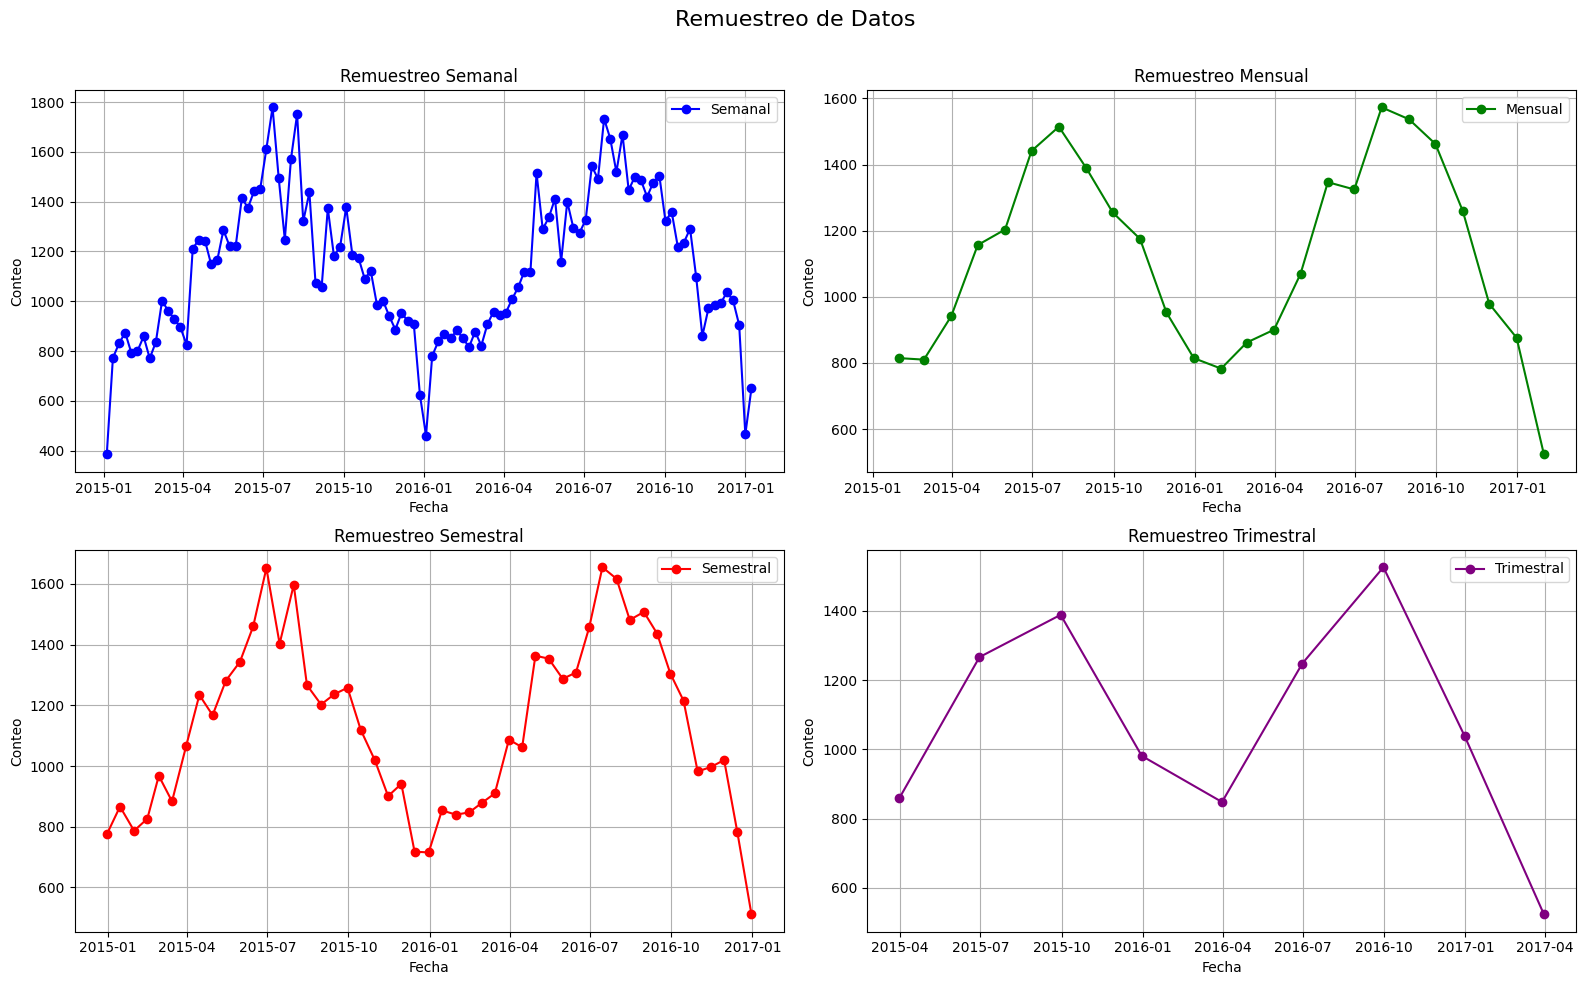

In [21]:
# Configurar la figura de subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))
fig.suptitle('Remuestreo de Datos', fontsize=16)

# Graficar remuestreo semanal
axes[0, 0].plot(weekly.index, weekly['Count'], label='Semanal', marker='o', color='blue')
axes[0, 0].set_title('Remuestreo Semanal')
axes[0, 0].set_xlabel('Fecha')
axes[0, 0].set_ylabel('Conteo')
axes[0, 0].grid(True)
axes[0, 0].legend()

# Graficar remuestreo mensual
axes[0, 1].plot(monthly.index, monthly['Count'], label='Mensual', color='green', marker='o')
axes[0, 1].set_title('Remuestreo Mensual')
axes[0, 1].set_xlabel('Fecha')
axes[0, 1].set_ylabel('Conteo')
axes[0, 1].grid(True)
axes[0, 1].legend()

# Graficar remuestreo semestral
axes[1, 0].plot(semi_monthly.index, semi_monthly['Count'], label='Semestral', color='red', marker='o')
axes[1, 0].set_title('Remuestreo Semestral')
axes[1, 0].set_xlabel('Fecha')
axes[1, 0].set_ylabel('Conteo')
axes[1, 0].grid(True)
axes[1, 0].legend()

# Graficar remuestreo trimestral
axes[1, 1].plot(quarterly.index, quarterly['Count'], label='Trimestral', color='purple', marker='o')
axes[1, 1].set_title('Remuestreo Trimestral')
axes[1, 1].set_xlabel('Fecha')
axes[1, 1].set_ylabel('Conteo')
axes[1, 1].grid(True)
axes[1, 1].legend()

# Ajustar los subplots para evitar que se solapen
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Ajusta el espacio en la parte superior para el título global

# Mostrar la figura
plt.show()

Tomaremos el 80% para entrenar y el 20% para testear

In [22]:
train_size = int(len(df) * 0.8)
test_size = len(df) - train_size
print(f'El shape en train: {train_size} \n El shape en test: {test_size}')

El shape en train: 13931 
 El shape en test: 3483


In [23]:
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]

In [24]:
print(len(train), len(test))


13931 3483


La estandariacion de los datos es como un requisito comun para muchos algoritmos de machine learning, ya que estos pueden ser sensibles a la escala de los datos

 La estandarizacion de los datos implica restar la media de cada columna y dividir por la desviacion estandar, lo que resulta en una distribucion con una media de 0 y una desviacion estandar de 1

Sin embargo los valores atipicos a menudo pueden afectar negativamente la estandarizacion, ya que pueden afectar la media y la desviacion estandar, por lo que es importante considerar si se deben eliminar o no los valores atipicos antes de estandarizar los datos

Algunas veces la mediana y el rango intercuartilico son mas robustos a los valores atipicos que la media y la desviacion estandar, por lo que podrian ser una mejor opcion para la estandarizacion en presencia de valores atipicos

In [25]:
from sklearn.preprocessing import RobustScaler
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow import keras

In [26]:
scaler = RobustScaler()

# Supongamos que se quiere escalar las columnas numéricas del DataFrame  train
# Primero selecciona las columnas que deseamos escalar
columns_to_scale = ['Count', 'Real_time', 'Temp_feels', 'Humidity_percent', 'Wind_speed_km/h']

# Ajustar el escalador a los datos y transformarlos
df_scaled = scaler.fit_transform(train[columns_to_scale].to_numpy())

# Ya que df_scaled ya contiene los datos transformados, simplemente asigna esto de vuelta al DataFrame
train.loc[:, columns_to_scale] = df_scaled

# No es necesario llamar a transform de nuevo después de fit_transform si ya has aplicado la transformación
# Si necesiotamos transformar otros datos (como un conjunto de test), debebemos usar el objeto 'scaler' ajustado:
# test_scaled = scaler.transform(test[columns_to_scale].to_numpy())
# test.loc[:, columns_to_scale] = test_scaled


In [27]:
train

,Count,Real_time,Temp_feels,Humidity_percent,Wind_speed_km/h,Weather,is_holiday,is_weekend,season,Year,Month,Day
Time,,,,,,,,,,,,
2015-01-04 00:00:00,-0.461866,-1.1875,-1.05,0.975,-0.909091,3.0,0.0,1.0,3.0,2015,1,4
2015-01-04 01:00:00,-0.493083,-1.1875,-1.00,0.975,-1.000000,1.0,0.0,1.0,3.0,2015,1,4
2015-01-04 02:00:00,-0.495921,-1.2500,-1.00,1.150,-1.454545,1.0,0.0,1.0,3.0,2015,1,4
2015-01-04 03:00:00,-0.539908,-1.3125,-1.05,1.325,-1.454545,1.0,0.0,1.0,3.0,2015,1,4
2015-01-04 04:00:00,-0.557645,-1.3125,-1.25,0.975,-0.863636,1.0,0.0,1.0,3.0,2015,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-09 22:00:00,0.019156,0.4375,0.35,-0.925,0.272727,1.0,0.0,0.0,1.0,2016,8,9
2016-08-09 23:00:00,-0.238382,0.3125,0.25,-0.725,0.000000,1.0,0.0,0.0,1.0,2016,8,9
2016-08-10 00:00:00,-0.376729,0.2500,0.20,-0.525,0.090909,1.0,0.0,0.0,1.0,2016,8,10


In [28]:
# Aplicar la transformación al conjunto de prueba
test_scaled = scaler.transform(test[columns_to_scale].to_numpy())

# Actualizar las columnas escaladas en el DataFrame de prueba
test.loc[:, columns_to_scale] = test_scaled

In [29]:
# 'train' y 'test' son los DataFrames de entrenamiento y prueba
# Variables independientes (todas las columnas excepto 'Count') ya que count es nuestra variable objetivo (target)
X_train = train.drop('Count', axis=1)
X_test = test.drop('Count', axis=1)

# Variable dependiente ('Count')
y_train = train['Count']
y_test = test['Count']


In [30]:
print(X_train.shape, y_train.shape)

(13931, 11) (13931,)


In [33]:
def createDataset(X, y, time_steps):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        data = X.iloc[i:(i + time_steps)].values
        Xs.append(data)        
        ys.append(y.iloc[i + time_steps])
        
    return np.array(Xs), np.array(ys)

time_steps = 10
X_train, y_train = createDataset(train, train.Count, time_steps)
X_test, y_test = createDataset(test, test.Count, time_steps)
print(X_train.shape, y_train.shape)

(13921, 10, 12) (13921,)


In [34]:
input_shape = (X_train.shape[1], X_train.shape[2])
input_shape

(10, 12)

Creamos el modelo

In [31]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Dropout, Input


In [35]:
# Definir el modelo
model = Sequential()
# Capa de entrada explícita
model.add(Input(shape=input_shape))
# Capa LSTM Bidireccional
model.add(Bidirectional(LSTM(units=128)))
# Dropout ayuda a prevenir el sobreajuste
model.add(Dropout(rate=0.2))
# Capa densa final
model.add(Dense(units=1))
model

<Sequential name=sequential_1, built=True>

In [37]:
# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Resumen del modelo
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 256)            │       144,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 144,641 (565.00 KB)

 Trainable params: 144,641 (565.00 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
history = model.fit(
    X_train, y_train, 
    epochs=10, 
    batch_size=32, 
    validation_split=0.1,
    shuffle=False
    )

Epoch 1/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.5881 - val_loss: 0.7903
Epoch 2/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.5373 - val_loss: 0.7914
Epoch 3/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.5166 - val_loss: 0.7871
Epoch 4/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.5084 - val_loss: 0.7901
Epoch 5/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.5033 - val_loss: 0.7914
Epoch 6/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.5019 - val_loss: 0.7926
Epoch 7/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.5008 - val_loss: 0.7911
Epoch 8/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.5003 - val_loss: 0.7940
Epoch 9/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.5001 - val_loss: 0.7911
Epoch 10/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.4996 - val_loss: 0.7909


In [42]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_1 (Bidirectional) │ (None, 256)            │       144,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 433,925 (1.66 MB)

 Trainable params: 144,641 (565.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 289,284 (1.10 MB)

# Segundo modelo: pruebas

In [52]:
df_segundo_modelo['Hour'] = df_segundo_modelo['Time'].dt.hour
df_segundo_modelo

,Time,Count,Real_time,Temp_feels,Humidity_percent,Wind_speed_km/h,Weather,is_holiday,is_weekend,season,Year,Month,Day,Hour
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,4,0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,4,1
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,4,2
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,4,3
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0,2017,1,3,19
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0,2017,1,3,20
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0,2017,1,3,21
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0,2017,1,3,22


In [53]:
# converting discrete variable "season" to bins
df_segundo_modelo = pd.get_dummies(df_segundo_modelo, columns=['season'], dtype=int)
df_segundo_modelo.head()


,Time,Count,Real_time,Temp_feels,Humidity_percent,Wind_speed_km/h,Weather,is_holiday,is_weekend,Year,Month,Day,Hour,season_0.0,season_1.0,season_2.0,season_3.0
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,2015,1,4,0,0,0,0,1
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,2015,1,4,1,0,0,0,1
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,2015,1,4,2,0,0,0,1
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,2015,1,4,3,0,0,0,1
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,2015,1,4,4,0,0,0,1


C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 1200x600 with 0 Axes>

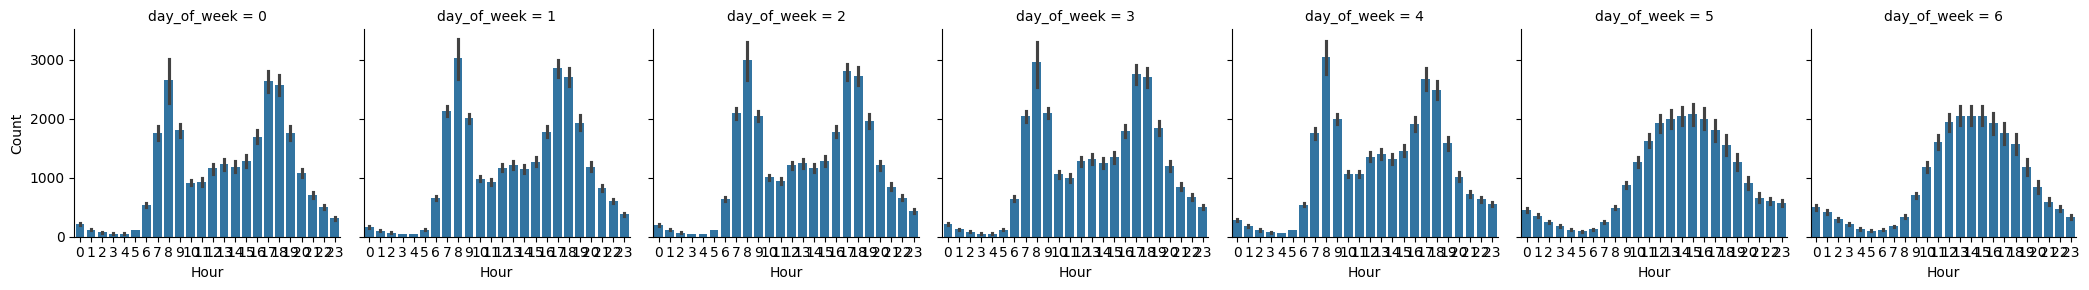

In [89]:
plt.figure(figsize=(12,6))
d = sns.FacetGrid(df_segundo_modelo, col="day_of_week")
d. map(sns.barplot, "Hour", "Count")

Patrones en los Días de Semana (Lunes a Viernes)

Horas Pico:
* Mañana: Alrededor de las 8-9 AM
* Tarde: Alrededor de las 5-6 PM

Interpretación: Estos picos indican que muchas personas utilizan las bicicletas para desplazarse al trabajo o la escuela durante estos horarios, reflejando los patrones típicos de desplazamiento de los días laborales.
Patrones en los Fines de Semana (Sábado y Domingo)

In [90]:
df_segundo_modelo

,Time,Count,Real_time,Temp_feels,Humidity_percent,Wind_speed_km/h,Weather,is_holiday,is_weekend,season,Year,Month,day_of_week,Day_of_month,week_of_year,Hour
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,6,4,1,0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,6,4,1,1
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,6,4,1,2
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,6,4,1,3
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,6,4,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0,2017,1,1,3,1,19
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0,2017,1,1,3,1,20
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0,2017,1,1,3,1,21
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0,2017,1,1,3,1,22


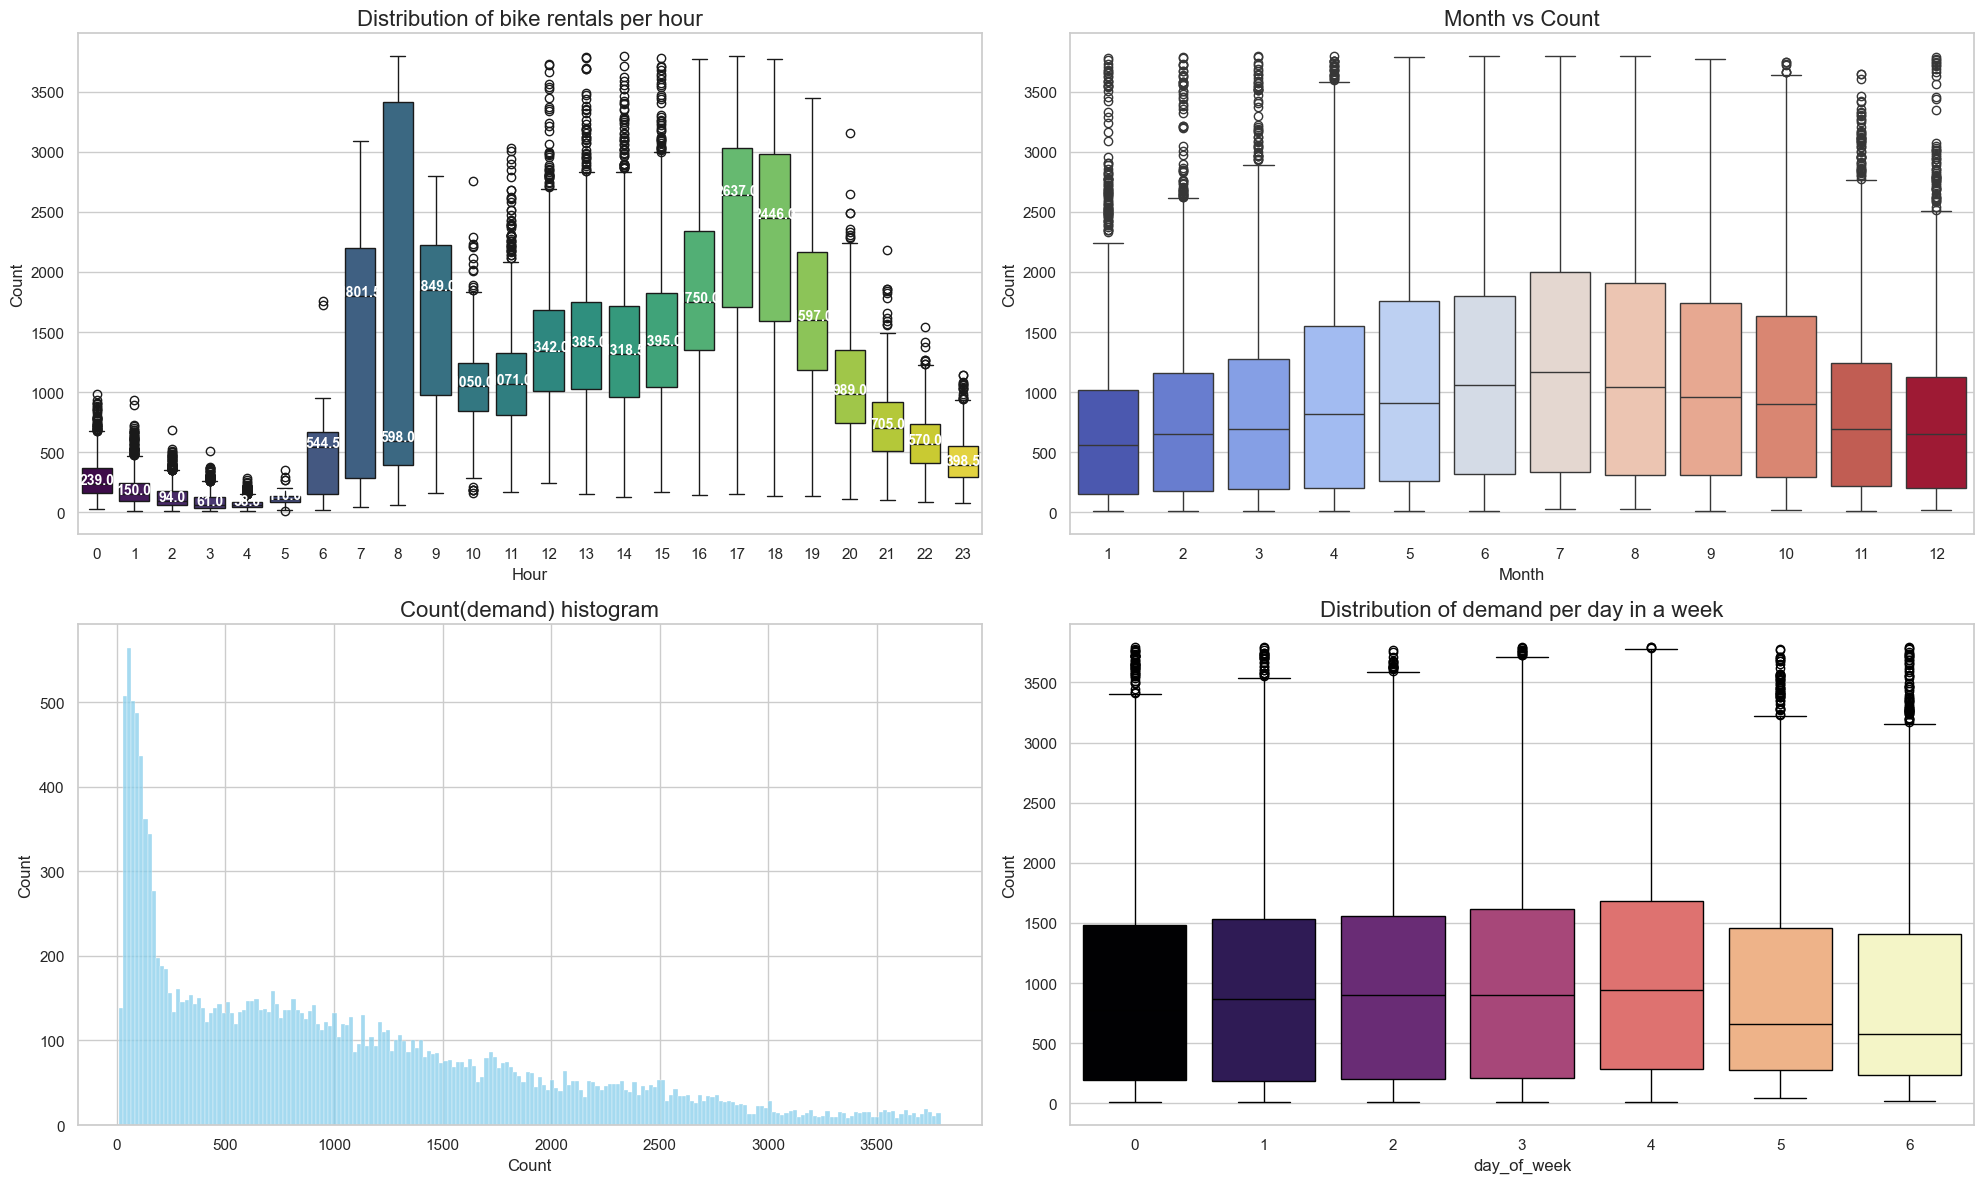

In [173]:
# Estilo decon Seaborn
sns.set(style="whitegrid")

# Creación de la figura con subplots
fig, axs = plt.subplots(2, 2, figsize=(20, 12))

# Primer gráfico: Distribution of bike rentals per hour
ax1 = axs[0, 0]
sns.boxplot(x='Hour', y='Count', hue='Hour', data=df_segundo_modelo, ax=ax1, palette="viridis", legend=False)
ax1.set_title('Distribution of bike rentals per hour', fontsize=16)
medians = df_segundo_modelo.groupby(['Hour'])['Count'].median().values
for xtick in ax1.get_xticks():
    ax1.text(xtick, medians[xtick], f'{medians[xtick]:.1f}', 
             horizontalalignment='center', size='small', color='white', weight='semibold')

# Segundo gráfico: Month vs Count
ax2 = axs[0, 1]
sns.boxplot(x='Month', y='Count', hue='Month', data=df_segundo_modelo, ax=ax2, palette="coolwarm", legend=False)
ax2.set_title('Month vs Count', fontsize=16)

# Tercer gráfico: Count(demand) histogram
ax3 = axs[1, 0]
sns.histplot(data=df_segundo_modelo, x='Count', bins=200, ax=ax3, color="skyblue")
ax3.set_title('Count(demand) histogram', fontsize=16)

# Cuarto gráfico: Distribution of demand per day in a week
ax4 = axs[1, 1]
sns.boxplot(data=df_segundo_modelo, x='day_of_week', y='Count', hue='day_of_week', ax=ax4, palette="magma", legend=False)
ax4.set_title('Distribution of demand per day in a week', fontsize=16)

# Ajustar la disposición de los subplots
plt.tight_layout()
plt.show()


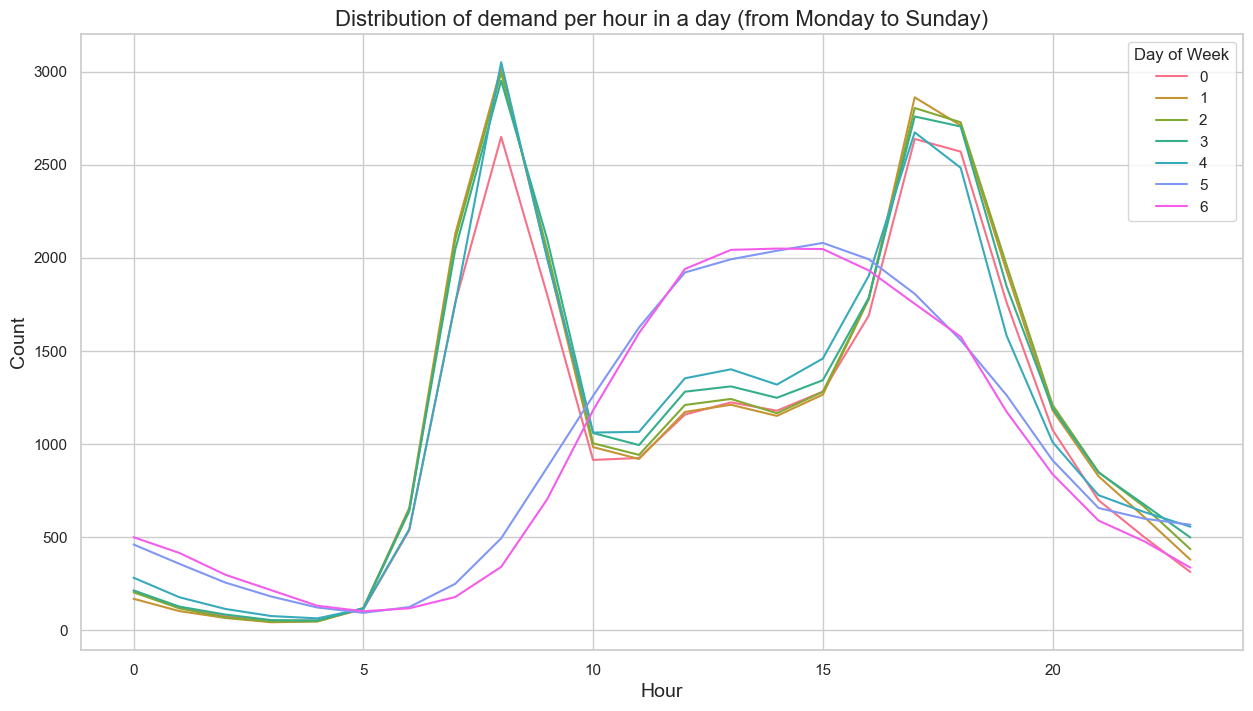

In [174]:
# Definir una paleta con exactamente 7 colores
palette = sns.color_palette("husl", 7)

# Creación del gráfico con lineplot
fig, ax = plt.subplots(figsize=(15, 8))
sns.lineplot(data=df_segundo_modelo, x='Hour', y='Count', hue='day_of_week', palette=palette, errorbar=None)
ax.set_title('Distribution of demand per hour in a day (from Monday to Sunday)', fontsize=16)
ax.set_xlabel('Hour', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
plt.legend(title='Day of Week')
plt.show()

In [229]:
data = df_segundo_modelo.copy()
data

,Time,Count,Real_time,Temp_feels,Humidity_percent,Wind_speed_km/h,Weather,is_holiday,is_weekend,season,Year,Month,day_of_week,Day_of_month,week_of_year,Hour
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,6,4,1,0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,6,4,1,1
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,6,4,1,2
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,6,4,1,3
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,6,4,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0,2017,1,1,3,1,19
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0,2017,1,1,3,1,20
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0,2017,1,1,3,1,21
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0,2017,1,1,3,1,22


Demanda Uniforme: 

La demanda es elevada y relativamente constante desde la mañana hasta la tarde (aproximadamente de las 10 AM a las 4 PM).
Interpretación: Este comportamiento sugiere que las bicicletas se utilizan más para actividades recreativas y de ocio durante todo el día en los fines de semana

In [213]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

import tensorflow as tf

In [214]:
data.drop(labels = ["Temp_feels"], axis = 1, inplace = True)

scaler_1 = MinMaxScaler()
columns_to_transform = ['Real_time', 'Humidity_percent', 'Wind_speed_km/h']
transform_1 = scaler_1.fit(data[columns_to_transform].to_numpy())
data.loc[:,columns_to_transform] = transform_1.transform(data[columns_to_transform].to_numpy())



In [215]:
# Ahora la variable objetivo 'Count'
scaler_2 = MinMaxScaler()
transform_2 = scaler_2.fit(data[["Count"]])
data["Count"] = transform_2.transform(data[["Count"]])

In [216]:
# Dropping the time feature columns
data.drop(labels = ['Time',
                    'Month', 'day_of_week', 'Hour', 'Year', 'Day_of_month', 'week_of_year'], axis = 1, inplace = True)
data.head()

,Count,Real_time,Humidity_percent,Wind_speed_km/h,Weather,is_holiday,is_weekend,season
0,0.022035,0.126761,0.911950,0.106195,3.0,0.0,1.0,3.0
1,0.016431,0.126761,0.911950,0.088496,1.0,0.0,1.0,3.0
2,0.015922,0.112676,0.955975,0.000000,1.0,0.0,1.0,3.0
3,0.008024,0.098592,1.000000,0.000000,1.0,0.0,1.0,3.0
4,0.004840,0.098592,0.911950,0.115044,1.0,0.0,1.0,3.0


In [217]:
df_Y = data["Count"]
df_X = data.drop(labels = ["Count"], axis = 1)

data_array_X, data_array_Y = df_X.values, df_Y.values

In [218]:
# Preparing the data to feed it into the LSTM model'''

LEN_DATA = (data.shape[0])
SEQ_LENGTH = 24
X, Y = [], []

for i in range(LEN_DATA - SEQ_LENGTH):
    x, y = data_array_X[i:SEQ_LENGTH + i], data_array_Y[SEQ_LENGTH + i]
    x, y = np.array(x), np.array(y)
    X.append(x); Y.append(y)
    
X, Y = np.array(X), np.array(Y)

In [219]:
# Ya que X y Y ya están definidos como arrays de NumPy
# definimos el tamaño de entrenamiento 
train_size = 0.8  # 80% para entrenamiento

# Calcular el índice de división
split_index = int(X.shape[0] * train_size)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train = X[:split_index]
Y_train = Y[:split_index]
X_test = X[split_index:]
Y_test = Y[split_index:]

# Imprimir los tamaños de los conjuntos para verificar
print("Tamaño del conjunto de entrenamiento:", X_train.shape, Y_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape, Y_test.shape)

Tamaño del conjunto de entrenamiento: (13911, 24, 7) (13911,)
Tamaño del conjunto de prueba: (3478, 24, 7) (3478,)


In [220]:
def LSTM_model(neurons, time_steps, features):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(neurons,input_shape=(time_steps,features), return_sequences = True)))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(neurons, return_sequences = True)))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(neurons)))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Dense(1,activation="sigmoid"))

    return model

In [221]:
model = LSTM_model(neurons = 16, time_steps = 24, features = 7)
model.compile(optimizer = "RMSprop", loss = "mse")

C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [222]:
training_logs = model.fit(X_train, Y_train, batch_size = 64, epochs = 40, validation_split = 0.15, verbose = True)

Epoch 1/40
185/185 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - loss: 0.0279 - val_loss: 0.0253
Epoch 2/40
185/185 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step - loss: 0.0170 - val_loss: 0.0235
Epoch 3/40
185/185 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - loss: 0.0170 - val_loss: 0.0224
Epoch 4/40
185/185 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0156 - val_loss: 0.0192
Epoch 5/40
185/185 ━━━━━━━━━━━━━━━━━━━━ 10s 55ms/step - loss: 0.0141 - val_loss: 0.0155
Epoch 6/40
185/185 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - loss: 0.0131 - val_loss: 0.0138
Epoch 7/40
185/185 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0116 - val_loss: 0.0129
Epoch 8/40
185/185 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0111 - val_loss: 0.0124
Epoch 9/40
185/185 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0109 - val_loss: 0.0118
Epoch 10/40
185/185 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0100 - val_loss: 0.0118
Epoch 11/40
185/185 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0100 - val_loss: 0.0119
Epoch 12/40
185/185 ━━━━━━━━━━━━━━━━━━

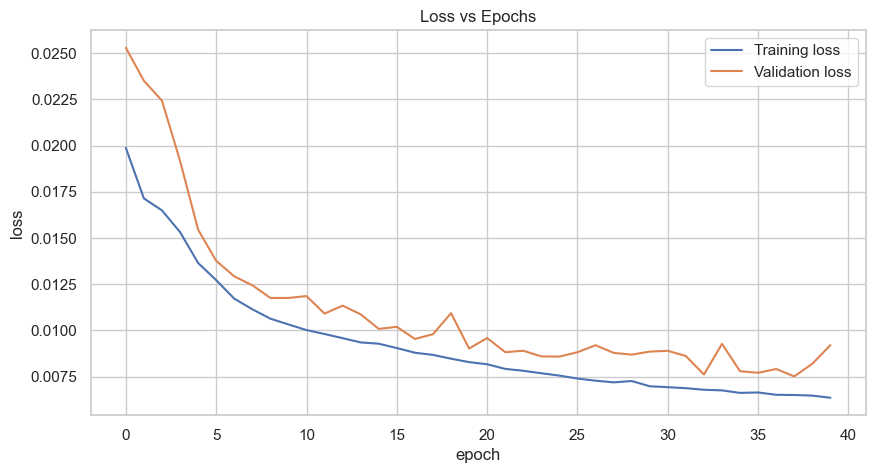

In [223]:
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(training_logs.history["loss"], label = 'Training loss')
plt.plot(training_logs.history["val_loss"], label='Validation loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss vs Epochs')
plt.legend()
plt.show()

In [224]:
Y_pred = model.predict(X_test)


109/109 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step


In [225]:
Y_pred_rescaled = scaler_2.inverse_transform(Y_pred)
Y_test_rescaled = scaler_2.inverse_transform(Y_test.reshape(-1,1))

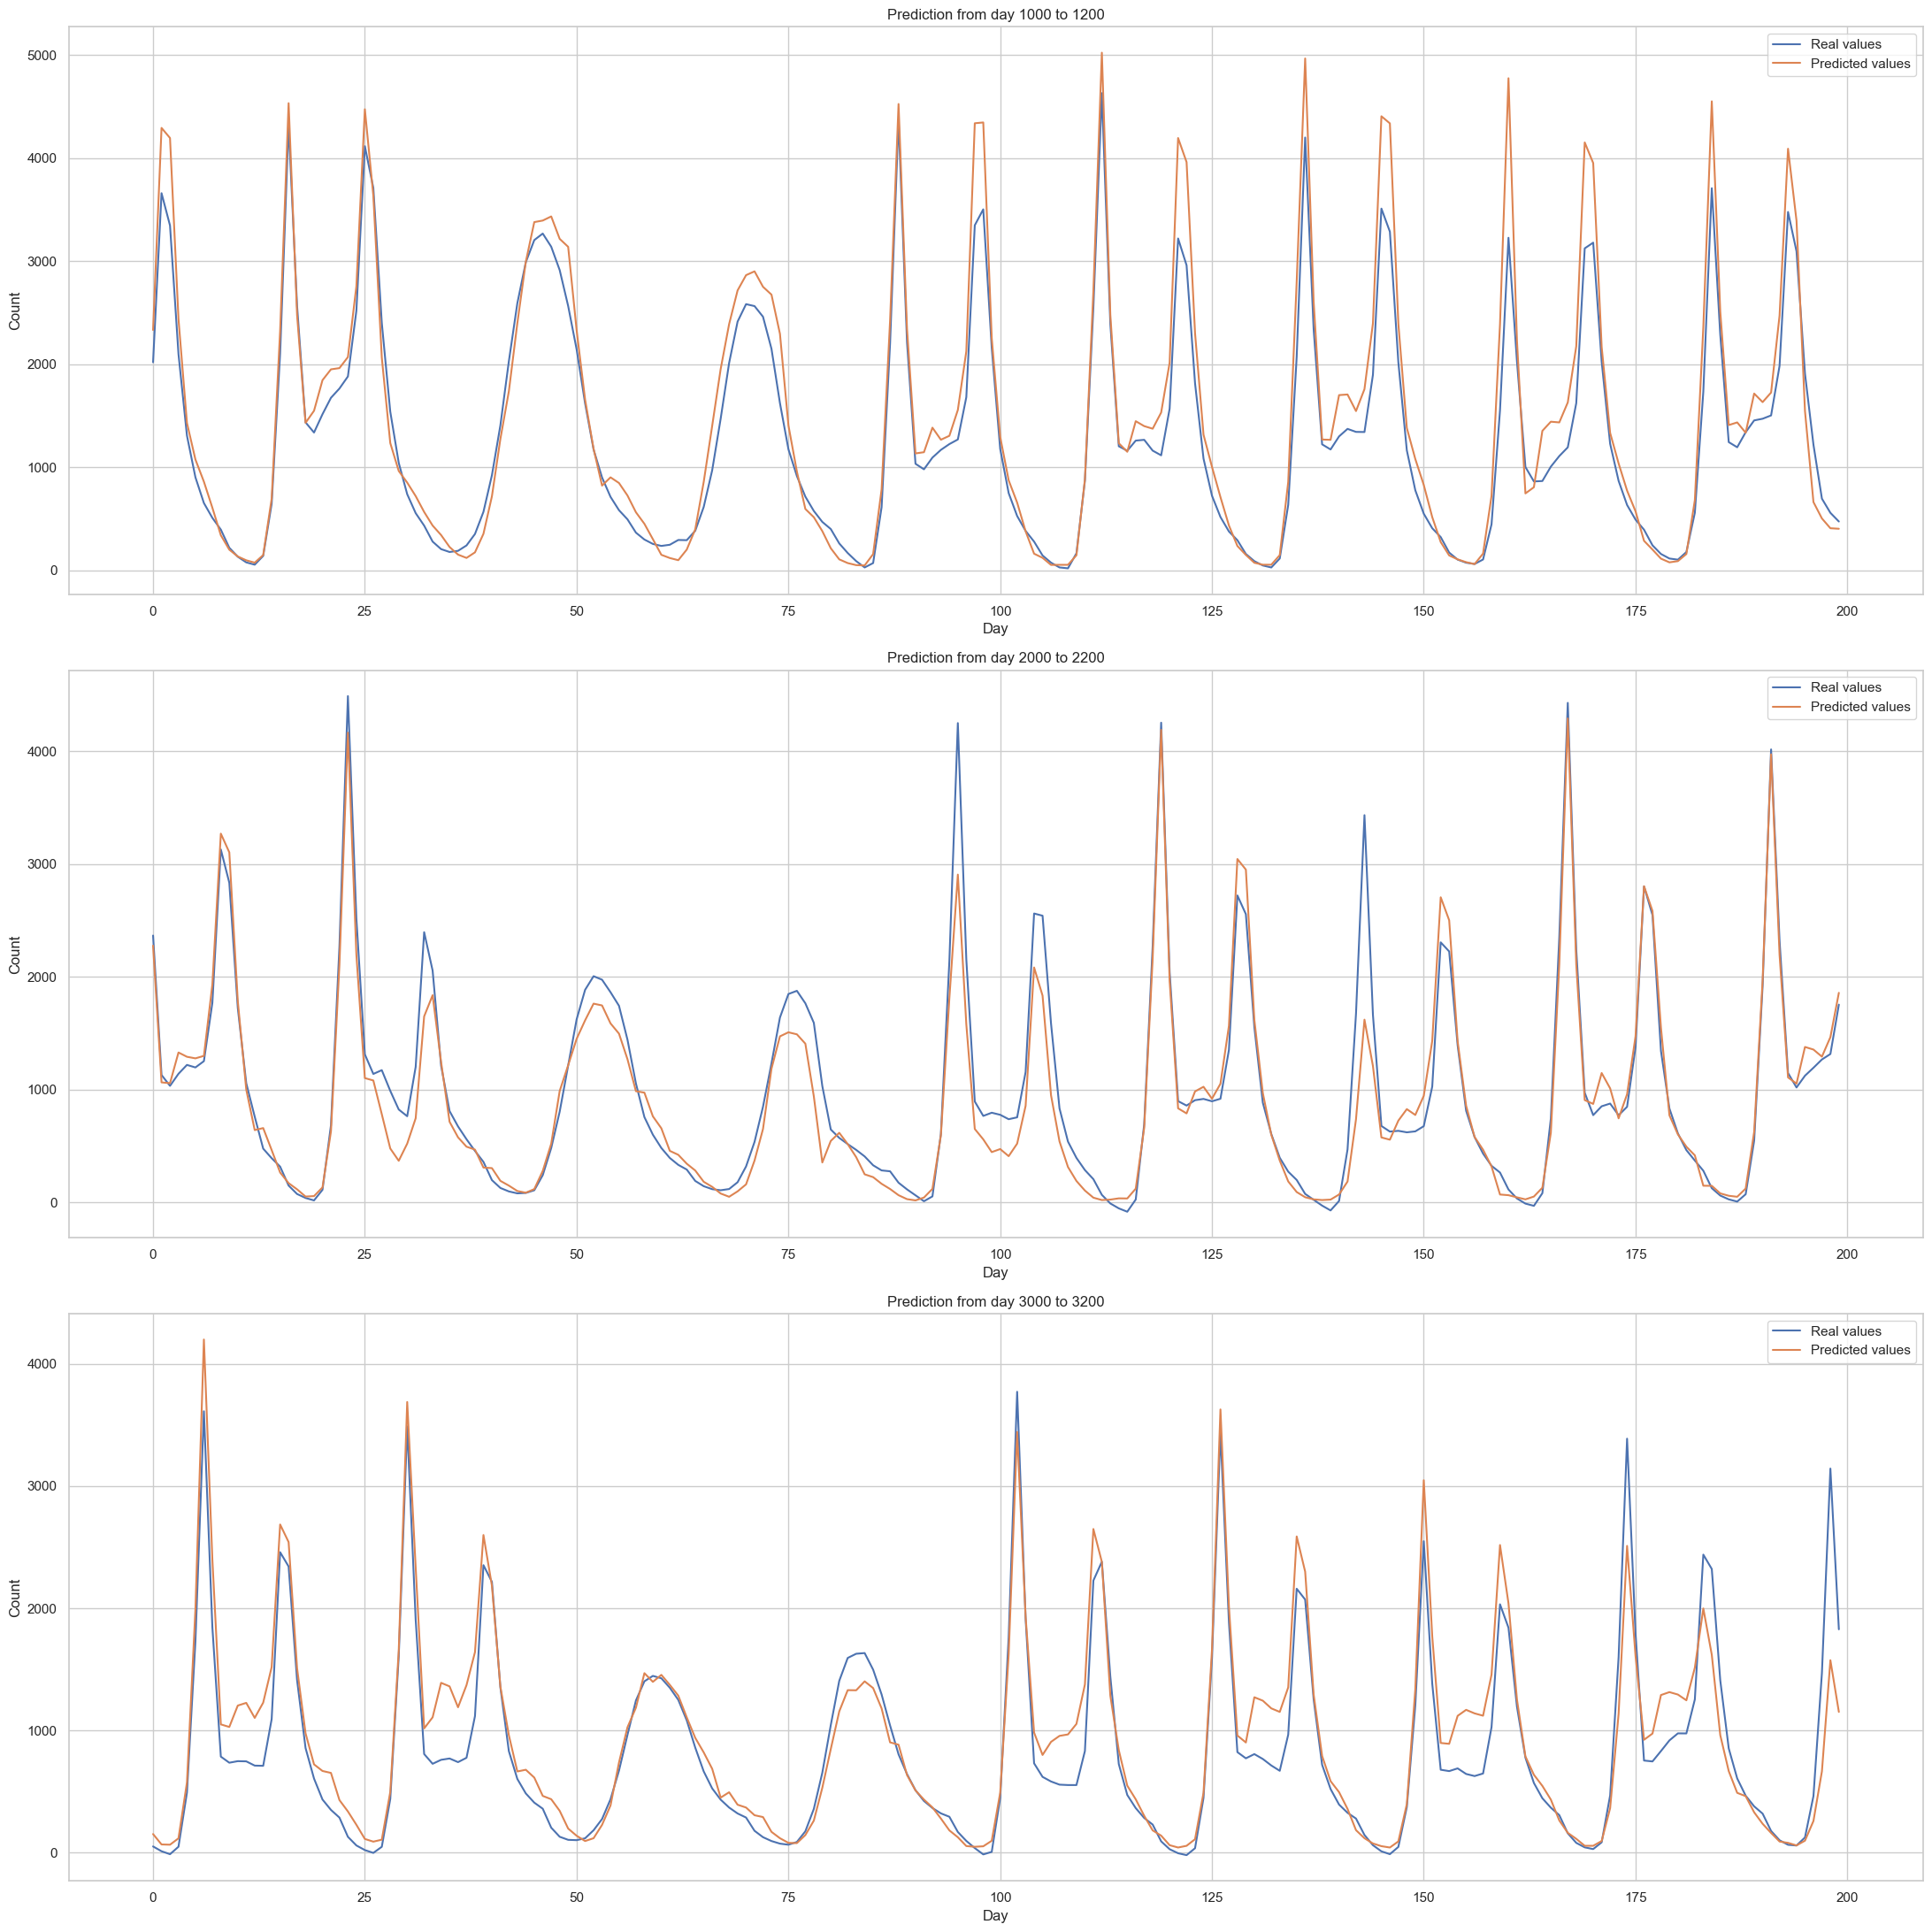

In [232]:
idx = 1000
fig, ax = plt.subplots(3, 1, figsize=(22, 22))

for i in range(1, 4):
    ax[i-1].plot(Y_pred_rescaled[i*idx: i*idx + 200], label="Real values")
    ax[i-1].plot(Y_test_rescaled[i*idx: i*idx + 200], label="Predicted values")
    ax[i-1].set_title(f"Prediction from day {i*idx} to {i*idx + 200}")
    ax[i-1].set_xlabel("Day")
    ax[i-1].set_ylabel("Count")
    ax[i-1].legend()

# Ajustar la disposición de los subplots
plt.tight_layout()
plt.show()


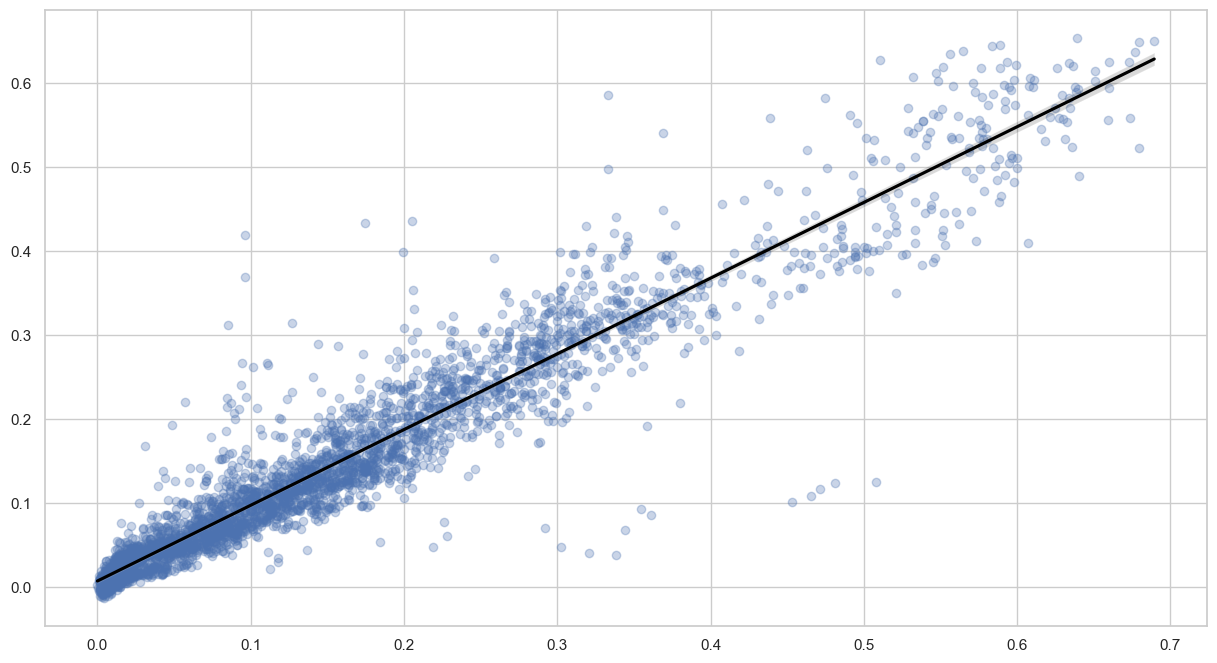

In [233]:
fig, ax = plt.subplots(figsize = (15, 8))
sns.regplot(x = Y_test, y = Y_pred, scatter_kws={'alpha':0.3}, line_kws={'color':'black'})
plt.show()

In [228]:
print(r2_score(Y_test, Y_pred))

0.5936665748853747


In [196]:
# Separar las características y la variable objetivo
df_Y = data["Count"]
df_X = data.drop(labels=["Count"], axis=1)

data_array_X, data_array_Y = df_X.values, df_Y.values



Tamaño del conjunto de entrenamiento: (13911, 24, 15) (13911,)
Tamaño del conjunto de prueba: (3478, 24, 15) (3478,)
Epoch 1/40


C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


185/185 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - loss: 0.0263 - val_loss: 0.0139
Epoch 2/40
185/185 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0110 - val_loss: 0.0135
Epoch 3/40
185/185 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - loss: 0.0107 - val_loss: 0.0131
Epoch 4/40
185/185 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0102 - val_loss: 0.0124
Epoch 5/40
185/185 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0101 - val_loss: 0.0123
Epoch 6/40
185/185 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0100 - val_loss: 0.0121
Epoch 7/40
185/185 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0102 - val_loss: 0.0117
Epoch 8/40
185/185 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0090 - val_loss: 0.0112
Epoch 9/40
185/185 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - loss: 0.0086 - val_loss: 0.0062
Epoch 10/40
185/185 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0058 - val_loss: 0.0041
Epoch 11/40
185/185 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0041 - val_loss: 0.0031
Epoch 12/40
185/185 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/st

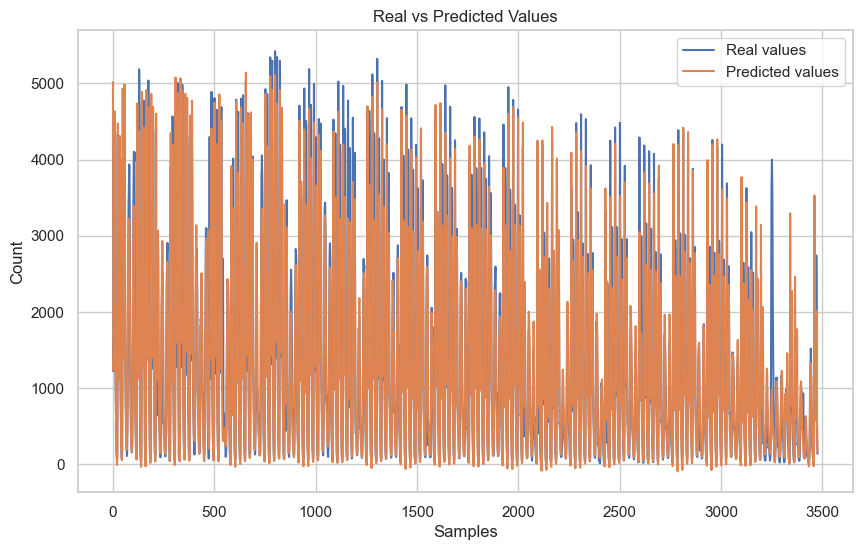

In [230]:
# Convertir todas las columnas a tipo numérico
data = data.apply(pd.to_numeric, errors='coerce')

# Asegurarse de que no hay valores NaN
data = data.dropna()

# Separar las características y la variable objetivo
df_Y = data["Count"]
df_X = data.drop(labels=["Count"], axis=1)

data_array_X, data_array_Y = df_X.values, df_Y.values

# Escalar las características y la variable objetivo
scaler_X = MinMaxScaler()
data_array_X = scaler_X.fit_transform(data_array_X)
scaler_Y = MinMaxScaler()
data_array_Y = scaler_Y.fit_transform(data_array_Y.reshape(-1, 1)).flatten()

# Preparar los datos para el modelo LSTM
LEN_DATA = data.shape[0]
SEQ_LENGTH = 24
X, Y = [], []

for i in range(LEN_DATA - SEQ_LENGTH):
    x, y = data_array_X[i:SEQ_LENGTH + i], data_array_Y[SEQ_LENGTH + i]
    X.append(np.array(x))
    Y.append(np.array(y))

X, Y = np.array(X), np.array(Y)

# Dividir los datos en conjuntos de entrenamiento y prueba
train_size = 0.8  # 80% para entrenamiento
split_index = int(X.shape[0] * train_size)

X_train = X[:split_index]
Y_train = Y[:split_index]
X_test = X[split_index:]
Y_test = Y[split_index:]

print("Tamaño del conjunto de entrenamiento:", X_train.shape, Y_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape, Y_test.shape)

# Definir el modelo LSTM
def LSTM_model(neurons, time_steps, features):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(neurons, input_shape=(time_steps, features), return_sequences=True)))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(neurons, return_sequences=True)))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(neurons)))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Dense(1, activation="linear"))
    return model

model = LSTM_model(neurons=16, time_steps=SEQ_LENGTH, features=X_train.shape[2])
model.compile(optimizer="adam", loss="mse")

# Entrenar el modelo
training_logs = model.fit(X_train, Y_train, batch_size=64, epochs=40, validation_split=0.15, verbose=1)

# Evaluar el modelo
loss = model.evaluate(X_test, Y_test)
print(f'Loss: {loss}')

# Realizar predicciones
Y_pred = model.predict(X_test)

# Reescalar las predicciones
Y_pred_rescaled = scaler_Y.inverse_transform(Y_pred.reshape(-1, 1)).flatten()
Y_test_rescaled = scaler_Y.inverse_transform(Y_test.reshape(-1, 1)).flatten()

# Graficar las predicciones vs los valores reales
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(Y_test_rescaled, label='Real values')
plt.plot(Y_pred_rescaled, label='Predicted values')
plt.title('Real vs Predicted Values')
plt.xlabel('Samples')
plt.ylabel('Count')
plt.legend()
plt.show()

In [231]:
print(r2_score(Y_test, Y_pred))

0.9139287337509093
